# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "./data//Mouse_metadata.csv"
study_results_path = "./data//Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [46]:
# Checking the number of mice.
mouse_num = mouse_study["Mouse ID"].nunique()
mouse_num

249

In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicates["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_study[mouse_study["Mouse ID"].isin(duplicates["Mouse ID"])]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study.drop_duplicates(subset="Mouse ID")
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [50]:
# Checking the number of mice in the clean DataFrame.
cleaned_num = cleaned_df["Mouse ID"].nunique()
cleaned_num

249

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



summery_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume.values,
    "Tumor Volume Variance": tumor_volume_variance.values,
    "Tumor Volume Std. Dev.": tumor_volume_std_dev.values,
    "Tumor Volume Std. Err.": tumor_volume_std_err
    
})
summery_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

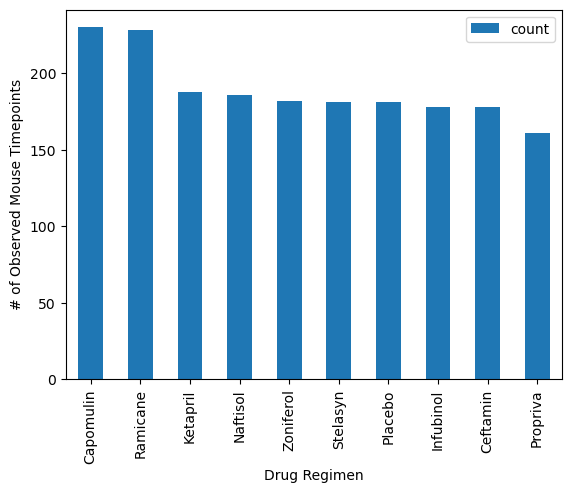

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# create a new dataframe called drug_count to make it easier to graph
drug_count = mouse_study["Drug Regimen"].value_counts().reset_index()
drug_count.columns = ["Drug Regimen", "count"]

drug_count.plot(x="Drug Regimen", y="count", kind='bar')

# Set labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

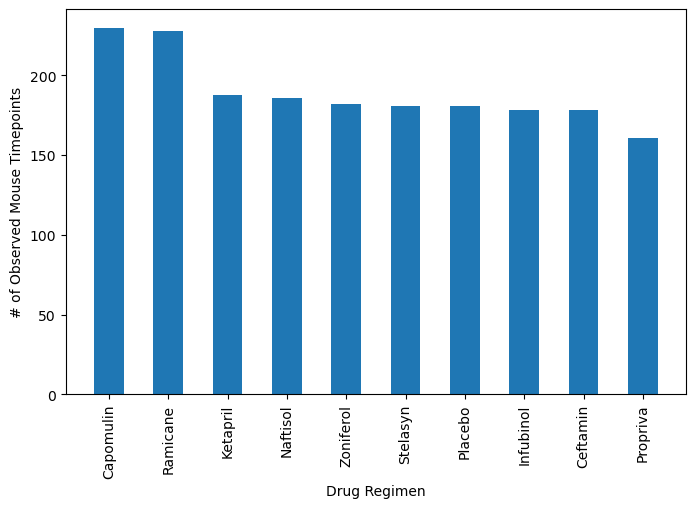

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(8, 5))
plt.bar(drug_count["Drug Regimen"], drug_count["count"], width=0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

In [55]:
pie_mouse_study = mouse_study["Sex"].value_counts()
pie_mouse_study

Male      958
Female    935
Name: Sex, dtype: int64

AttributeError: 'Axes' object has no attribute 'set_xticklabels_pie'

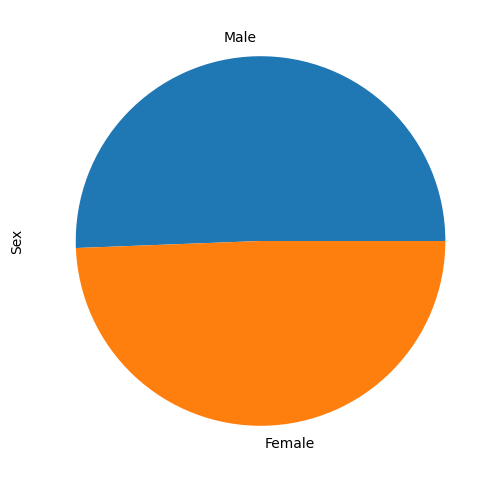

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_pandas = pie_mouse_study.plot(kind="pie", y="Sex", figsize=(8,6),
                                   ylabel="Sex")

xticklabels_pie = pie_mouse_study.index
pie_pandas.set_xticklabels_pie(xticklabels_pie, autopct='%1.1f%%', startangle=0, labels=xticklabels)



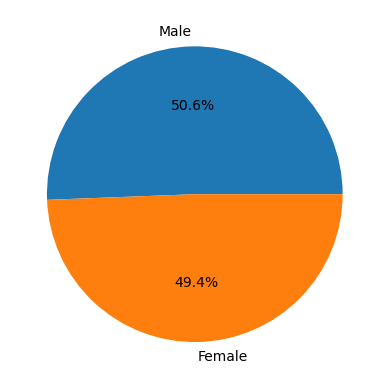

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_mice = mouse_study["Sex"].value_counts()["Male"]
female_mice = mouse_study["Sex"].value_counts()["Female"]

pie_labels = ["Male", "Female"]
mice_sex =  [male_mice, female_mice]
explode = (0, 0)

plt.pie(mice_sex, explode=explode,  labels=pie_labels, autopct="%1.1f%%", startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
summery_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study.groupby("Mouse ID")["Timepoint"].last().reset_index()
max_timepoint.info
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merged = pd.merge(mouse_study, max_timepoint, on="Mouse ID", how="left")
max_merged.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,35
3,a457,0,45.0,0,Ketapril,Female,11,30,10
4,c819,0,45.0,0,Ketapril,Male,21,25,40


In [60]:

# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_datas = []

q1 = mouse_study['Tumor Volume (mm3)'].quantile(0.25)
q3 = mouse_study['Tumor Volume (mm3)'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_names:
    treatment_df = mouse_study[mouse_study["Drug Regimen"] == treatment] 
    tumor_vol_data = treatment_df.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
    tumor_vol_datas.append(tumor_vol_data)
    
outliers = mouse_study[(mouse_study["Tumor Volume (mm3)"] < lower_bound) | (mouse_study["Tumor Volume (mm3)"] > upper_bound)]

print(f"Capomulin's potential outliers: Series[{tumor_vol_datas[0].values}]")
print(f"Ramicane's potential outliers: Series([{tumor_vol_datas[1].values}]")
print(f"Infubinol's potential outliers: Series([{tumor_vol_datas[2].values}]")
print(f"Ceftamin's potential outliers: Series([{tumor_vol_datas[3].values}]")

Capomulin's potential outliers: Series[[38.98287774 38.93963263 30.48598484 37.07402422 40.1592203  47.68596303
 37.31184577 38.1251644  38.75326548 41.48300765 38.84687569 28.43096411
 33.32909778 46.53920617 32.37735684 41.58152074 23.34359787 40.72857787
 34.45529799 31.02392294 40.65812366 39.95234669 36.04104736 28.48403281
 31.8962384 ]]
Ramicane's potential outliers: Series([[38.4076183  43.0475426  38.81036633 32.97852192 38.34200823 33.39765251
 37.31123552 40.65900627 29.12847181 33.56240217 36.37451039 31.56046955
 36.13485243 22.05012627 30.56462509 31.09533505 45.22086888 36.56165229
 37.22565033 43.41938077 30.27623175 40.66771292 43.16637266 44.18345092
 30.63869575]]
Infubinol's potential outliers: Series([[67.97341878 65.52574285 57.03186187 66.08306589 72.2267309  36.3213458
 60.96971133 62.43540402 60.91876652 67.28962147 66.19691151 62.11727887
 47.01036401 60.16518046 55.62942846 45.69933088 54.65654872 55.65068132
 46.25011212 54.04860769 51.54243058 50.00513807 5

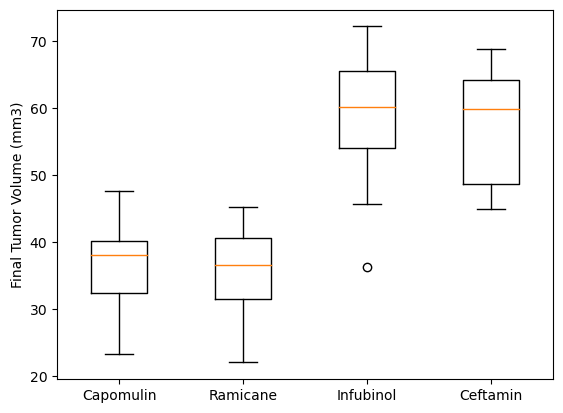

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volu_data = [tumor_vol_datas[0].values,tumor_vol_datas[1].values,tumor_vol_datas[2].values,tumor_vol_datas[3].values]

plt.boxplot(tumor_volu_data, labels= treatment_names)

# Set plot labels and title
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

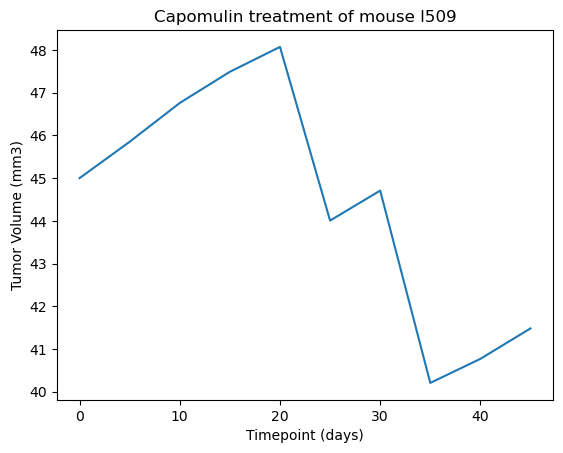

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = mouse_study[mouse_study["Mouse ID"] == "l509"]
mouse_l509_data_x = mouse_l509_data["Timepoint"].values
mouse_l509_data_y = mouse_l509_data["Tumor Volume (mm3)"].values
mouse_l509_data

plt.plot(mouse_l509_data_x, mouse_l509_data_y)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


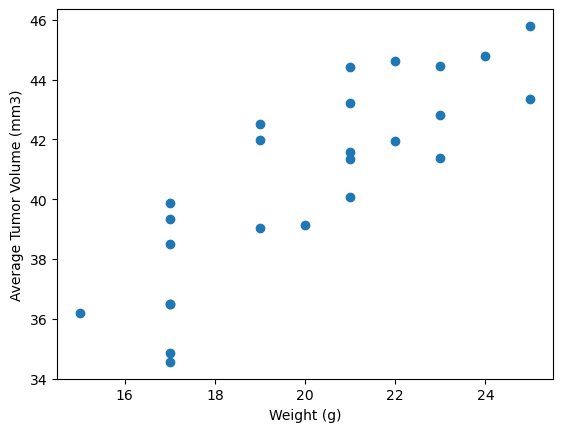

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study[mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_data_tumor = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_data_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].apply(lambda x: x.astype(float).mean())

plt.scatter(capomulin_data_weight, capomulin_data_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


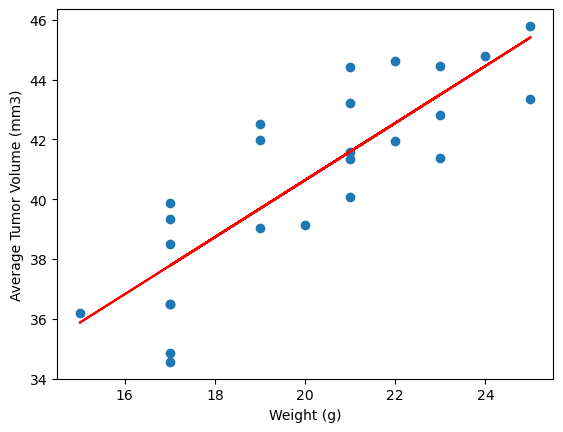

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = np.corrcoef(capomulin_data_weight, capomulin_data_tumor)[0,1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation.round(2)}")

slope, intercept = np.polyfit(capomulin_data_weight, capomulin_data_tumor, 1)
regression_line = slope * capomulin_data_weight + intercept

plt.scatter(capomulin_data_weight, capomulin_data_tumor)
plt.plot(capomulin_data_weight, regression_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()